In [1]:
import scanpy as sc
sc.set_figure_params(dpi=100, frameon=False)
sc.logging.print_header()

/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)
2022-02-04 21:09:30.611449: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-04 21:09:30.611478: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


scanpy==1.8.2 anndata==0.7.6 umap==0.5.2 numpy==1.20.3 scipy==1.5.3 pandas==1.3.4 scikit-learn==1.0.2 statsmodels==0.11.1 python-igraph==0.8.3 leidenalg==0.8.3 pynndescent==0.5.5


Accession: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM4150378

In [2]:
%%time
adata = sc.read('Srivatsan_2019_raw.h5ad')
is_counts = True
adata

CPU times: user 2.7 s, sys: 5.13 s, total: 7.83 s
Wall time: 17.9 s


AnnData object with n_obs × n_vars = 581777 × 58347
    obs: 'cell_type', 'dose', 'dose_character', 'dose_pattern', 'g1s_score', 'g2m_score', 'pathway', 'pathway_level_1', 'pathway_level_2', 'product_dose', 'product_name', 'proliferation_index', 'replicate', 'size_factor', 'target', 'vehicle'
    var: 'id', 'num_cells_expressed-0-0', 'num_cells_expressed-1-0', 'num_cells_expressed-1'

In [3]:
adata.obs.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
cell_type,581777,3,MCF7,292010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dose,581777.0,NaN,NaN,NaN,2442.078546,3998.180329,0.0,10.0,100.0,1000.0,10000.0
dose_character,581777,5,10,153013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dose_pattern,581777,4,4,156274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
g1s_score,581777.0,NaN,NaN,NaN,1.51545,0.923619,0.0,0.915307,1.558071,2.174137,5.227012
g2m_score,581777.0,NaN,NaN,NaN,1.757476,0.923809,0.0,1.158509,1.815805,2.429784,4.718647
pathway,581777,22,Epigenetics,121599,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pathway_level_1,581777,17,Epigenetic regulation,147875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pathway_level_2,581777,55,Histone deacetylation,97378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_dose,581777,753,Vehicle_0,13004,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Add metalabels. TODO: turn this into a %load.

In [ ]:
adata.uns['preprocessing_nb_link'] = ##
adata.uns['doi'] = ##

Filter. TODO: make the two below blocks individual %loads.

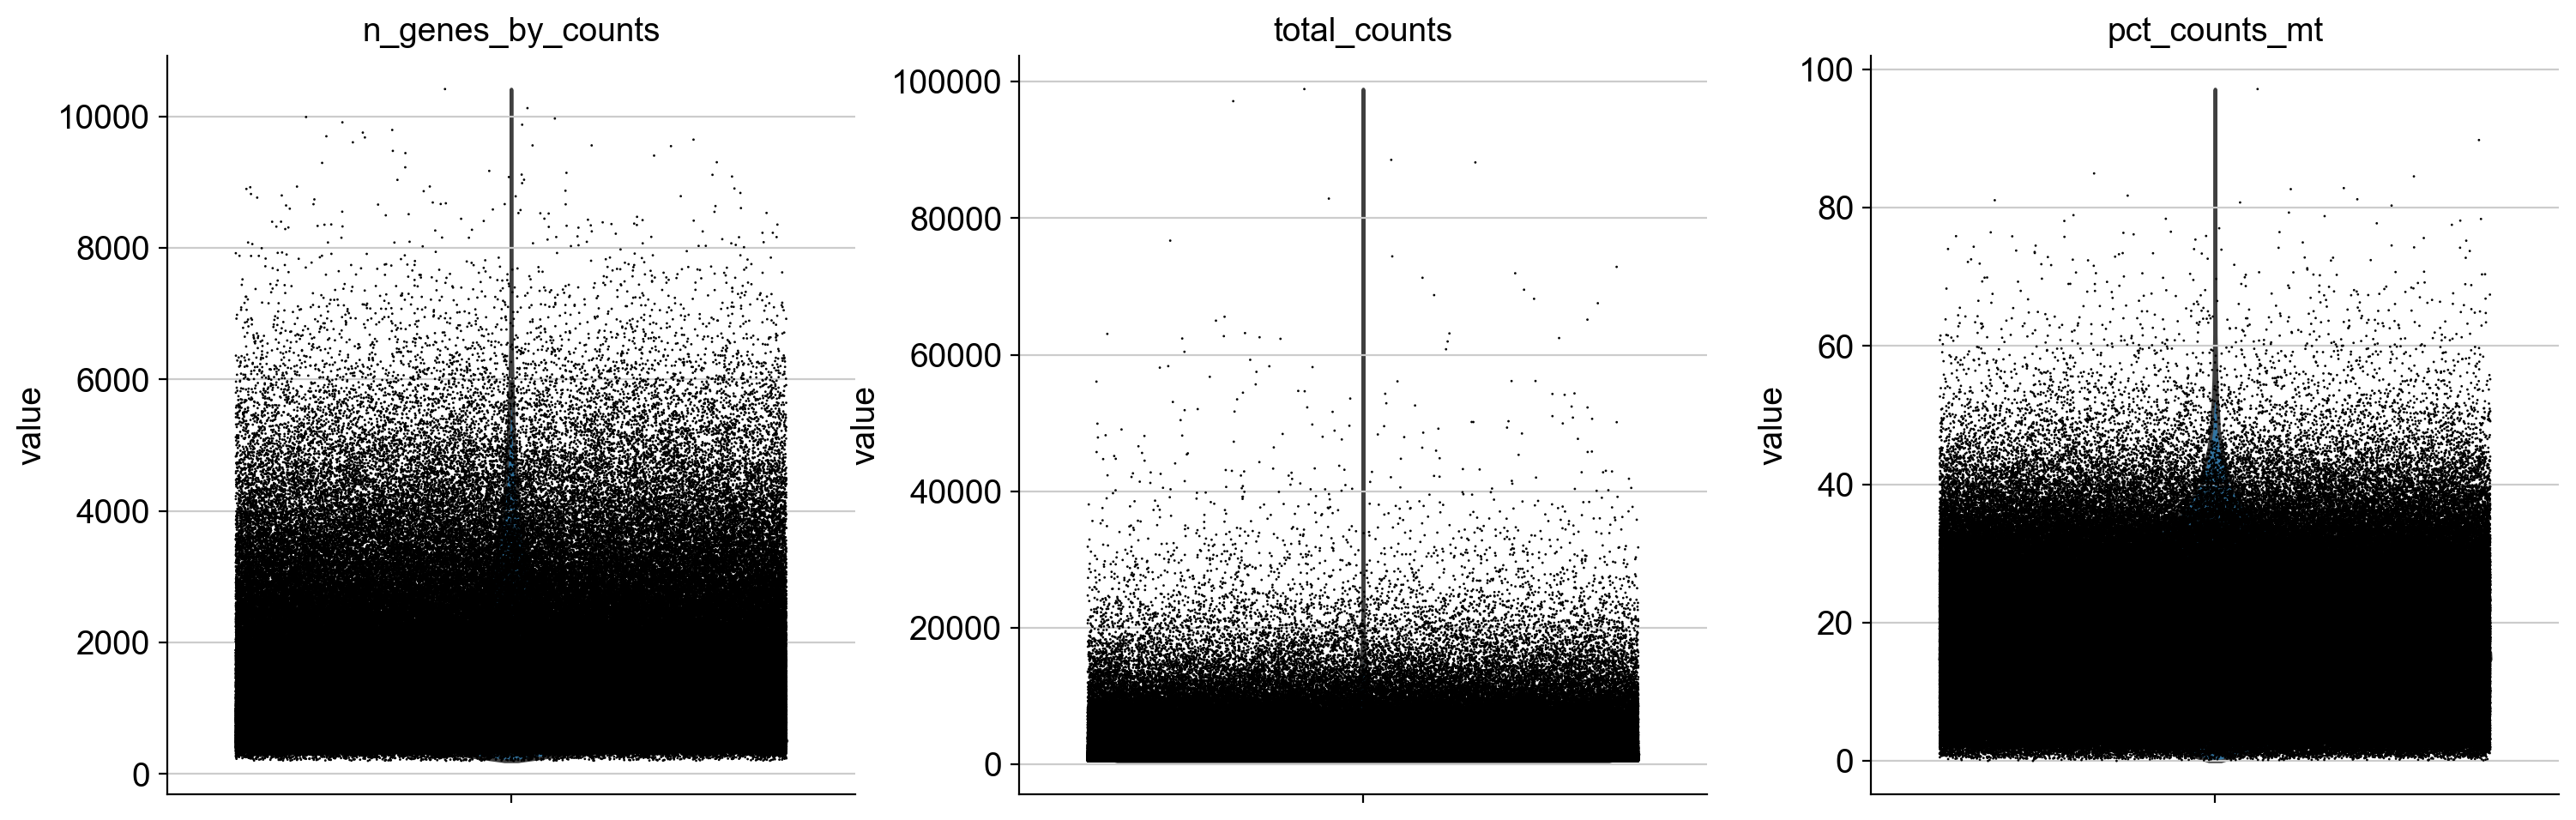

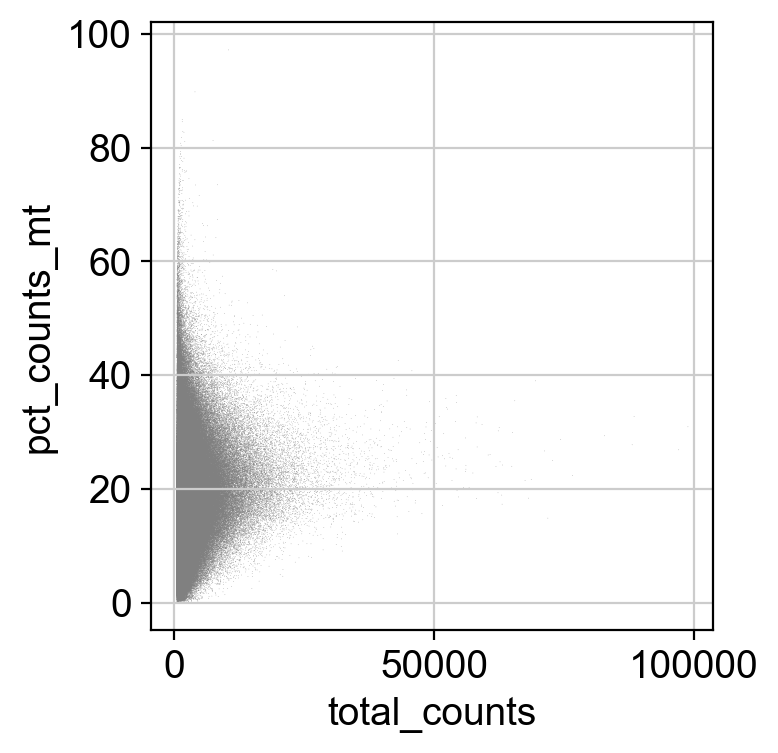

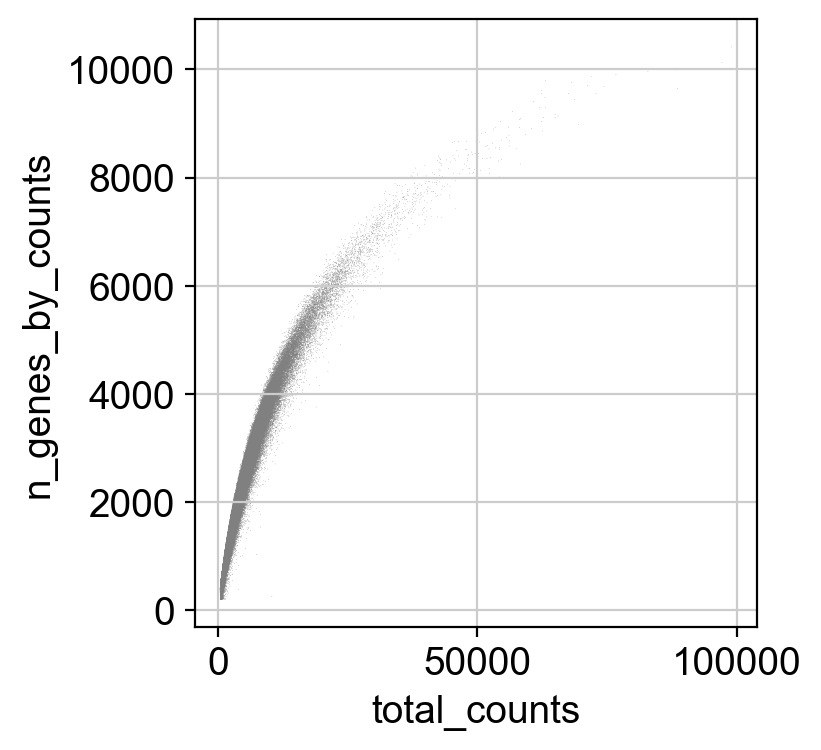

In [4]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=20)

adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

adata.var_names_make_unique()

In [5]:
adata = adata[adata.obs.n_genes_by_counts < 8000, :]  # edit
adata = adata[adata.obs.pct_counts_mt < 50]

Normalize and add plotting variables.

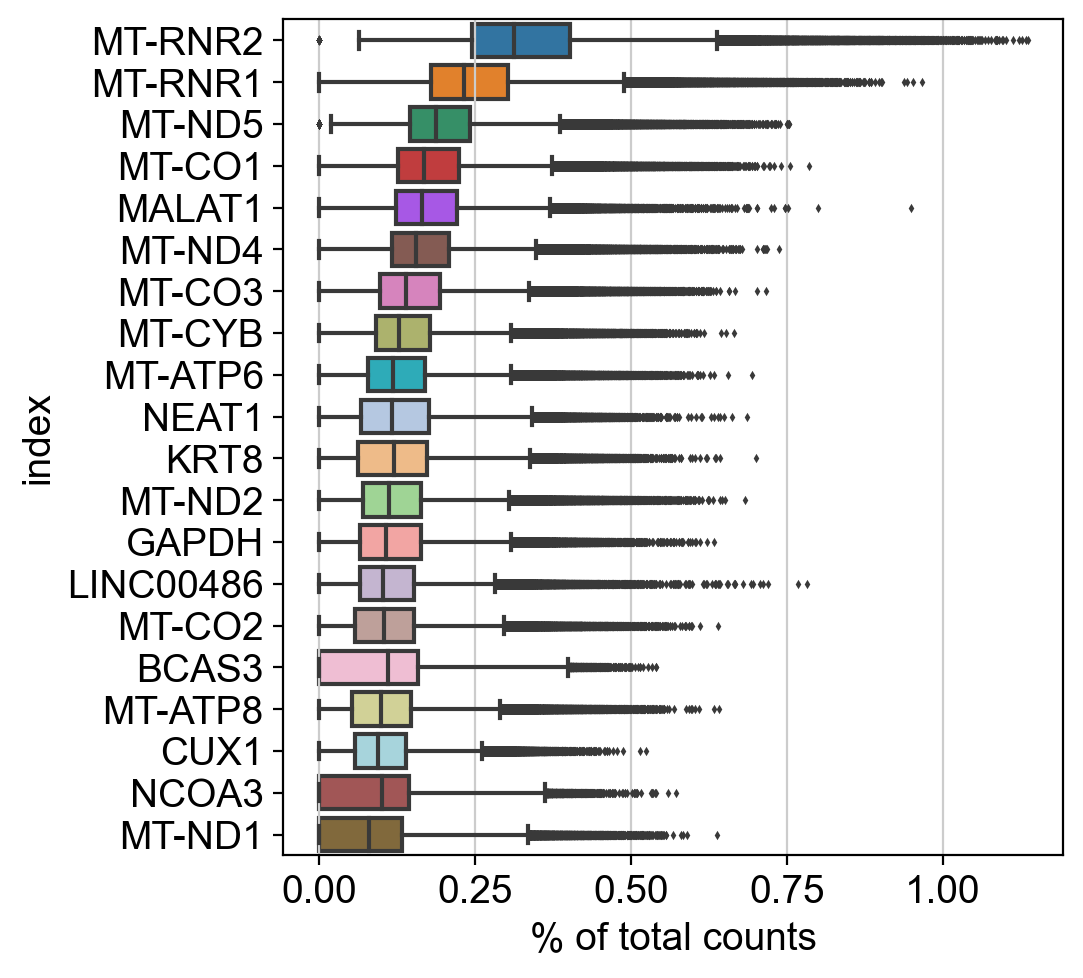

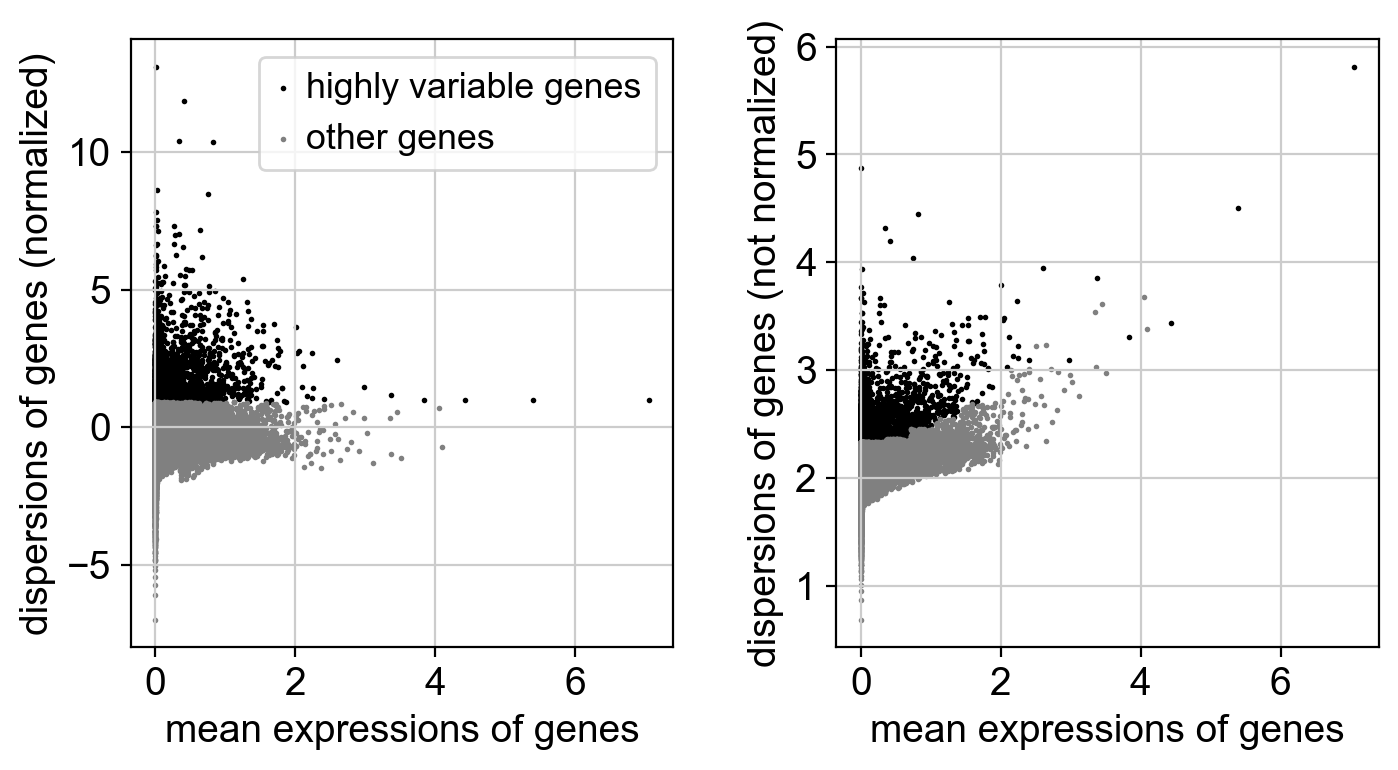

In [6]:
if is_counts:
    adata.layers['counts'] = adata.X
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)

sc.pl.highest_expr_genes(adata, n_top=20)
sc.pp.highly_variable_genes(adata, n_top_genes=5000, subset=False)
sc.pl.highly_variable_genes(adata)

# pre-compute plots
sc.tl.pca(adata, use_highly_variable=True)
sc.pp.neighbors(adata)
sc.tl.leiden(adata)
sc.tl.umap(adata)

Save.

In [7]:
sc.write('Srivatsan_2019.h5ad', adata, compression='gzip')
adata

AnnData object with n_obs × n_vars = 579483 × 34636
    obs: 'cell_type', 'dose', 'dose_character', 'dose_pattern', 'g1s_score', 'g2m_score', 'pathway', 'pathway_level_1', 'pathway_level_2', 'product_dose', 'product_name', 'proliferation_index', 'replicate', 'size_factor', 'target', 'vehicle', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'id', 'num_cells_expressed-0-0', 'num_cells_expressed-1-0', 'num_cells_expressed-1', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'
    layers: 'counts'

Standardized perturbation labels and save again.

In [ ]:
adata = sc.read('Srivatsan_2019.h5ad')

In [ ]:
adata.obs['perturbation_type'] = 'small molecule'
adata.obs['perturbation_name'] = ##
adata.obs['perturbation_value'] = np.where(adata.obs['group_name'].str.contains('LPS'), True, np.nan)
adata.obs['perturbation_unit'] = np.where(adata.obs['group_name'].str.contains('LPS'), 'boolean', np.nan)
## currently can only pick one of dose or time, do we care about the others?

In [ ]:
sc.write('Srivatsan_2019.h5ad', adata, compression='gzip')
adata

View.

In [ ]:
sc.pl.umap(adata, color=adata.obs.columns)